In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
bm=pd.read_csv('termdeposit_train.csv')

In [3]:
bm.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
bm.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [121]:
bm.shape

(31647, 18)

In [122]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [27]:
bm = bm.drop('duration',axis=1)

In [28]:
bm

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,7,337,12,failure,no


In [123]:
bm.shape

(31647, 18)

In [124]:
bm.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='previous', ylabel='Count'>

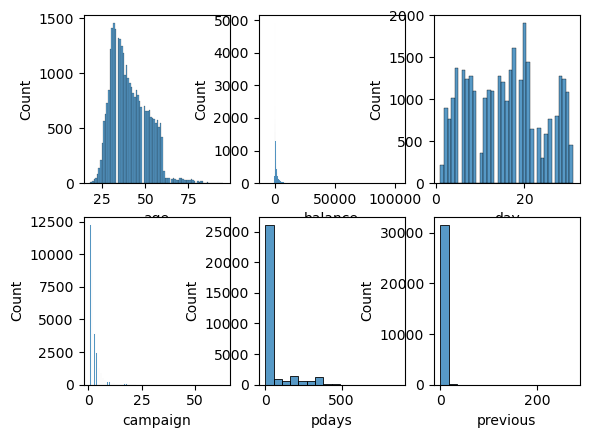

In [41]:
fig,axis =plt.subplots(2,3)

sns.histplot(data=bm,x='age',ax=axis[0,0])
sns.histplot(data=bm,x='balance',ax=axis[0,1])
sns.histplot(data=bm,x='day',ax=axis[0,2])
sns.histplot(data=bm,x='campaign',ax=axis[1,0])
sns.histplot(data=bm,x='pdays',ax=axis[1,1])
sns.histplot(data=bm,x='previous',ax=axis[1,2])


In [125]:
bm.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

no     27932
yes     3715
Name: subscribed, dtype: int64


Text(0.5, 1.0, 'Bank Deposit')

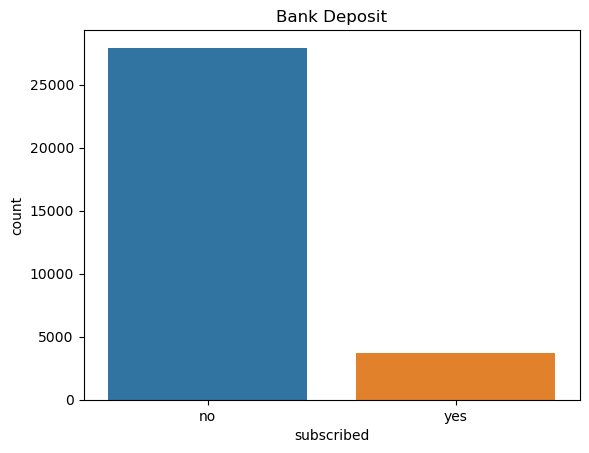

In [47]:
print(bm.subscribed.value_counts())
axes=sns.countplot(x='subscribed',data=bm)
plt.title('Bank Deposit')

In [126]:
bm.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

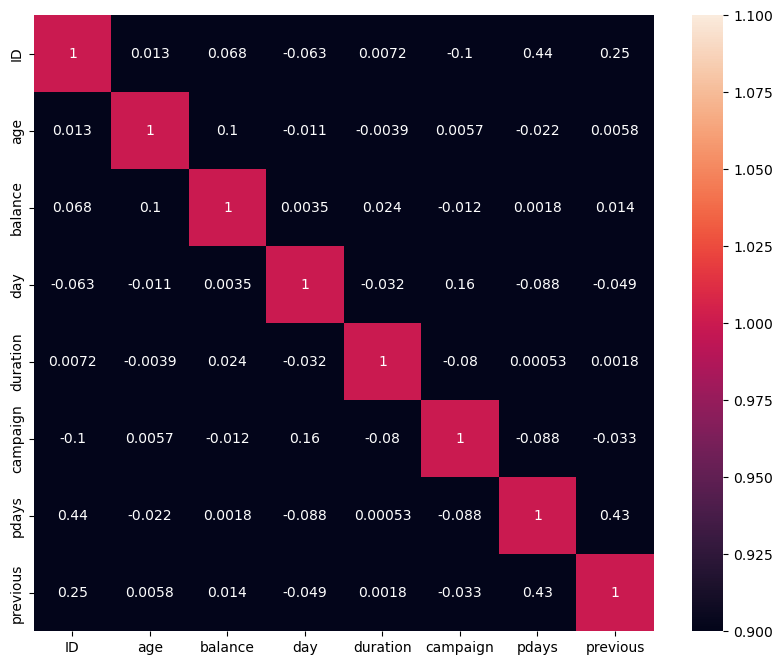

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(bm.corr(),annot=True, vmin=1.0, vmax=1.0)
plt.show()

In [128]:
bm.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [129]:
le=LabelEncoder()
bm['job']=le.fit_transform(bm['job'])

list1=['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']
for val in list1:
    bm[val]=le.fit_transform(bm[val].astype(str))
    
bm  

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,3,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,9,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,6,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,11,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,6,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,6,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,6,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,11,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


In [130]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          31647 non-null  int64
 1   age         31647 non-null  int64
 2   job         31647 non-null  int32
 3   marital     31647 non-null  int32
 4   education   31647 non-null  int32
 5   default     31647 non-null  int32
 6   balance     31647 non-null  int64
 7   housing     31647 non-null  int32
 8   loan        31647 non-null  int32
 9   contact     31647 non-null  int32
 10  day         31647 non-null  int64
 11  month       31647 non-null  int32
 12  duration    31647 non-null  int64
 13  campaign    31647 non-null  int64
 14  pdays       31647 non-null  int64
 15  previous    31647 non-null  int64
 16  poutcome    31647 non-null  int32
 17  subscribed  31647 non-null  int32
dtypes: int32(10), int64(8)
memory usage: 3.1 MB


In [131]:
bm.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<AxesSubplot:>

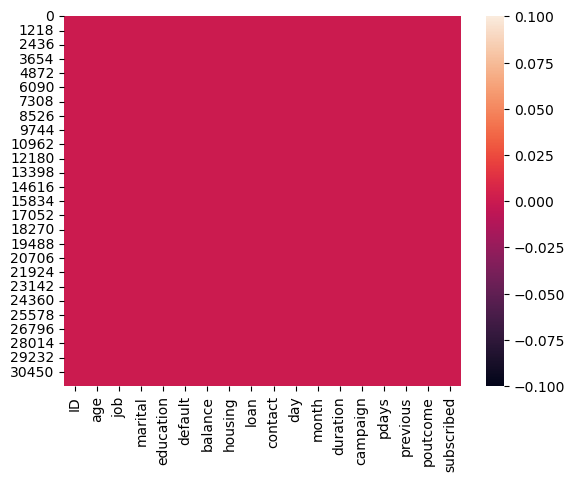

In [132]:
sns.heatmap(bm.isnull())

In [133]:
X = bm.drop(columns=['ID', 'subscribed'])
y = bm['subscribed']

In [134]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [136]:
y_pred = rf_classifier.predict(X_val)

In [137]:
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.906477093206951


In [138]:
test_data = pd.read_csv("1termdeposit_test.csv")

In [139]:
test_data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [140]:
le=LabelEncoder()
test_data['job']=le.fit_transform(test_data['job'])

list1=['job','marital','education','default','housing','loan','contact','month','poutcome']
for val in list1:
    test_data[val]=le.fit_transform(test_data[val].astype(str))
    
test_data  

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,9,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,7,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,8,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,9,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,6,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,7,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [141]:
test_predictions = rf_classifier.predict(test_data.drop(columns=['ID']))


In [142]:
submission_df = pd.DataFrame({'ID': test_data['ID'], 'subscribed': test_predictions})


In [143]:
submission_df.to_csv("submission.csv", index=False)